In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

#Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve

In [51]:
schema = pd.read_csv('data/zillow_data_dictionary.csv')
schema

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


## data import

In [77]:
# import urllib.request
# # Download the file from `url` and save it locally under :
# urllib.request.urlretrieve("http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data", "crx.csv")
df = pd.read_csv('data/properties_2016.csv')


In [78]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [79]:
len(df)

2985217

In [186]:
df_err = pd.read_csv('data/train_2016_v2.csv')
len(df_err)

90275

In [187]:
df_err.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [197]:
df_train = df.merge(df_err,how='inner',on=['parcelid'])

In [198]:
len(df_train)
df_train.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08


In [190]:
df_train['transactiondate'].map(lambda x: x.split('-')[0]).value_counts()

2016    90275
Name: transactiondate, dtype: int64

In [199]:
df_train['transactionmonth'] = df_train['transactiondate'].map(lambda x: x.split('-')[1])

In [200]:
df_train = df_train.fillna(0)

In [201]:
df_train.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,...,90275.000000,90275.000000,9.027500e+04,9.027500e+04,90275.0,9.027500e+04,90275.000000,90275.000000,9.027500e+04,90275.000000
mean,1.298466e+07,0.579086,0.020903,0.339895,2.279474,3.031869,0.000709,3.536461,2.278981,0.481063,...,1952.047566,0.328286,1.793353e+05,4.576676e+05,2015.0,2.783322e+05,5983.578210,0.264713,6.008611e+13,0.011457
std,2.504510e+06,1.880576,0.414654,18.205899,1.004271,1.156436,0.053248,3.077455,1.004660,5.614189,...,180.943163,0.657845,2.090147e+05,5.548834e+05,0.0,4.004943e+05,6838.823676,1.903536,4.939707e+12,0.161079
min,1.071174e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,2015.0,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.605000
25%,1.155950e+07,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,...,1952.000000,0.000000,8.064100e+04,1.990125e+05,2015.0,8.222750e+04,2872.470000,0.000000,6.037311e+13,-0.025300
50%,1.254734e+07,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,4.000000,2.000000,0.000000,...,1969.000000,0.000000,1.315070e+05,3.428720e+05,2015.0,1.929600e+05,4542.440000,0.000000,6.037603e+13,0.006000
75%,1.422755e+07,1.000000,0.000000,0.000000,3.000000,4.000000,0.000000,7.000000,3.000000,0.000000,...,1987.000000,0.000000,2.100425e+05,5.405890e+05,2015.0,3.454150e+05,6900.600000,0.000000,6.059042e+13,0.039200
max,1.629608e+08,13.000000,21.000000,1555.000000,20.000000,16.000000,4.000000,12.000000,20.000000,66.000000,...,2015.000000,4.000000,9.948100e+06,2.775000e+07,2015.0,2.450000e+07,321936.090000,99.000000,6.111009e+13,4.737000


## Clean and fill in missing data, combine categories based on data analysis.

In [ ]:
#x1
df.x1 = df.x1.fillna('m')

# X2 and X14 is currently in object, but they are continuous variable. So need to be converted.
# and fill missing data with median of the data.

#x2
df.x2=pd.to_numeric(df.x2, errors='coerce')  # not still  in df.describe(include=['O'])
df.x2.fillna(df.x2.median(), inplace=True)

# create 3 bins for X2 based on previous analysis
#3 categories
#youth <18
#young","adult"," <18-40
#","adult_2","senior  40 and above

bins = (-1, 18, 25, 40, 50, 200)
group_names = ['youth', 'young','adult', 'adult1','senior']
df.x2_bin = pd.cut(df.x2, bins, labels=group_names)

#bins = (-1, 18, 40, 200)
#group_names = ['youth', 'adult', 'seniorAdukt']

#??????????????????????????create additional indicator column in case for missing data.
#???? how to add a new column, don't see it in describe
df["x2_num"] = df.x2
df.x2 = pd.cut(df.x2, bins, labels=group_names)
## ?????????? the following does not work
## df["x2_bin"] = pd.cut(df.x2, bins, labels=group_names)

In [ ]:
# x14 not linear relationship so take bins based on charts
#x14, might need to be dropped, as this continuous variable has no consistent trend with approval rate.
df.x14=pd.to_numeric(df.x14, errors='coerce')  # not still  in df.describe(include=['O'])
df.x14.fillna(99999, inplace=True)

bins = (-1, 100,200 ,300,400 , 500,99998,100000)
group_names = ['l1', 'l2','l3', 'l4','l5','l6','l7']
df.x14_num = df.x14
df.x14 = pd.cut(df.x14, bins, labels=group_names)

In [ ]:
#x4,X5 category missing 6 numbers

df.x4 = df.x4.fillna('m')
df.x5 = df.x5.fillna('m')
#X6 C appears most, and  missing data has a similar approval rate as C
df.x6 = df.x4.fillna('c')

#####????????????????? do I need to combined categories X6 some categories has similar approval rates?
# similar questions for X7
#X7 v appears most, and  missing data has a similar approval rate as V
df.x7 = df.x7.fillna('v')
#??? x8 continuous bin or not  approval rate and X8 relationship positive relationship
df['x16'] = df['x16'].map( {'+': 1, '-': 0} ).astype(int)


## Modeling

In [202]:
from sklearn import preprocessing
# NORMALIZE CATEGORY VARIABLES
##LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. This is sometimes useful for writing efficient Cython routines.

str_var_list = [var[0] for var in df_train.dtypes.iteritems() if var[1]==object]
features = str_var_list
  
for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df_train[feature])
    df_train[feature] = le.transform(df_train[feature])
    

In [203]:

#First, separate the features(X) from the labels(y).
#X_all: All features minus the value we want to predict (Survived).
#y_all: Only the value we want to predict.

#Second, use Scikit-learn to randomly shuffle this data into four variables. 
#Here training 80% of the data, then testing against the other 20%.
from sklearn.model_selection import train_test_split

X_all = df_train.drop(['parcelid','transactiondate','logerror'],axis=1)
y_all = df_train['logerror']



num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=1)

In [204]:
np.mean(y_test)

0.013520138465798949

## Random Forrest Model

In [233]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,mean_squared_error

# Choose the type of classifier. 
model = RandomForestRegressor()

# Choose some parameter combinations to try
parameters = {'n_estimators': [20], 
              'max_features': ['auto'], 
              'max_depth': [20], 
              'min_samples_split': [2],
              'min_samples_leaf': [20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(mean_squared_error)

# Run the grid search
# read theory
grid_obj = GridSearchCV(model, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
model = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [234]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)

print mean_squared_error(y_train, p_train)
print mean_squared_error(y_test, p_test)


0.0225011300347
0.0265932070145


In [236]:
print np.std(y_test)
print np.sqrt(mean_squared_error(y_test, p_test))

0.16361574739
0.16307423774


In [237]:
sorted(zip(X_all.columns.values,model.feature_importances_), key=lambda x: x[1],reverse=True)

[('structuretaxvaluedollarcnt', 0.088298124797951238),
 ('taxamount', 0.084945843433763643),
 ('taxvaluedollarcnt', 0.074610442329121271),
 ('latitude', 0.073035363199078121),
 ('calculatedfinishedsquarefeet', 0.065696970621599404),
 ('lotsizesquarefeet', 0.064755914353329128),
 ('landtaxvaluedollarcnt', 0.058739670568730987),
 ('yearbuilt', 0.058543050066639221),
 ('regionidzip', 0.056752099086735751),
 ('finishedsquarefeet12', 0.054626350265638411),
 ('longitude', 0.053220043496480705),
 ('propertyzoningdesc', 0.034550806441003959),
 ('rawcensustractandblock', 0.029605701686233353),
 ('transactionmonth', 0.027836565572452676),
 ('censustractandblock', 0.025616900750780817),
 ('regionidcity', 0.023035862772232924),
 ('regionidneighborhood', 0.019195484395773794),
 ('bedroomcnt', 0.011972166105360223),
 ('finishedsquarefeet15', 0.011678194620958563),
 ('garagetotalsqft', 0.0095534169577841926),
 ('propertycountylandusecode', 0.0069769905047186859),
 ('buildingqualitytypeid', 0.00633118

In [168]:
df_sub = pd.read_csv('data/sample_submission.csv')




















In [169]:
df_sub.describe()

,ParcelId,201610,201611,201612,201710,201711,201712
count,2.985217e+06,2985217.0,2985217.0,2985217.0,2985217.0,2985217.0,2985217.0
mean,1.332586e+07,0.0,0.0,0.0,0.0,0.0,0.0
std,7.909966e+06,0.0,0.0,0.0,0.0,0.0,0.0
min,1.071172e+07,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.164371e+07,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.254509e+07,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.409712e+07,0.0,0.0,0.0,0.0,0.0,0.0
max,1.696019e+08,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
len(df)

2985217

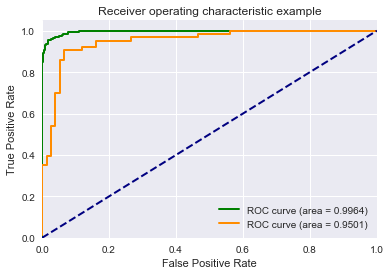

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

roc_auc_train = roc_auc_score(y_train, p_train)
fpr_train, tpr_train, _ = roc_curve(y_train, p_train)

roc_auc_test = roc_auc_score(y_test, p_test)
fpr_test, tpr_test, _ = roc_curve(y_test, p_test)
plt.figure()
lw = 2
plt.plot(fpr_train, tpr_train, color='green',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# to evaluate the compare ???? cross_val_score(model, x_all,y_all,cv=KFold(891, n_folds=10)).

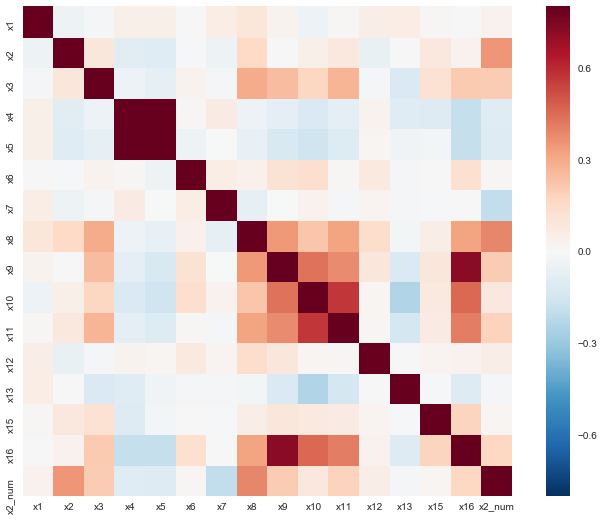

In [101]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), vmax=.8, square=True);
plt.show()

In [ ]:
#validation curve
def validation_curve_model(X, Y, model, param_name, parameters, cv, ylim, log=True):

    train_scores, test_scores = validation_curve(model, X, Y, param_name=param_name, param_range=parameters,cv=cv, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Validation curve")
    plt.fill_between(parameters, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameters, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")

    if log==True:
        plt.semilogx(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.semilogx(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    else:
        plt.plot(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.plot(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    #plt.ylim([0.55, 0.9])
    if ylim is not None:
        plt.ylim(*ylim)

    plt.ylabel('Score')
    plt.xlabel('Parameter C')
    plt.legend(loc="best")
    
    return plt

## Logistic Model

In [55]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
X=X_all
Y=y_all
param_range = np.logspace(-6, 5, 12)
param_grid = dict(C=param_range)
parameters=param_grid
#grid_search_model(X_train, y_train, model, param_grid, cv)
#def grid_search_model(X, Y, model, parameters, cv):
    
CV_model_logit = GridSearchCV(estimator=model, param_grid=parameters, cv=cv)
CV_model_logit.fit(X, Y)
CV_model_logit.cv_results_
print("Best Score:", CV_model_logit.best_score_," / Best parameters:", CV_model_logit.best_params_)
    

Best Score: 0.860289855072  / Best parameters: {'C': 100.0}


In [114]:
#########????????????????????????????????

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

y_score =CV_model_logit.decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


ValueError: Found input variables with inconsistent numbers of samples: [690, 138]

In [112]:
n_classes = Y.shape[1]

IndexError: tuple index out of range

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [97]:
#Validation Curve: Logistic Regression
param_name="C"
ylim=[0.55, 0.9]
param_range = np.logspace(-6, 3, 10)
parameters=param_range
log=True
#Determine training and test scores for varying parameter values.
#Compute scores for an estimator with different values of a specified parameter. This is similar to grid search with one parameter. However, this will also compute training scores and is merely a utility for plotting the results.
train_scores, test_scores = validation_curve(model, X, Y, param_name=param_name, param_range=parameters,cv=cv, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Validation curve")
plt.fill_between(parameters, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(parameters, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")

if log==True:
    plt.semilogx(parameters, train_scores_mean, 'o-', color="r",label="Training score")
    plt.semilogx(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")
else:
    plt.plot(parameters, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")

#plt.ylim([0.55, 0.9])
if ylim is not None:
    plt.ylim(*ylim)

    plt.ylabel('Score')
    plt.xlabel('Parameter C')
    plt.legend(loc="best")
plt.show()   


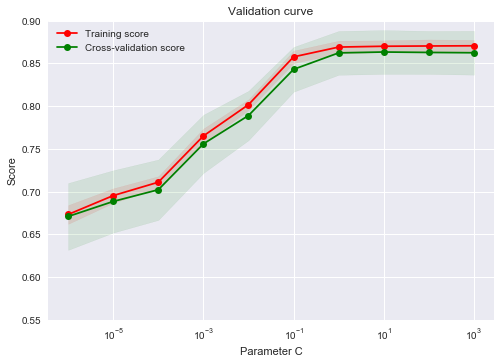

## Random Forest Version 2

In [103]:
#grid search:  (This step is very slow)
param_range = (np.linspace(10, 110, 10)).astype(int)
param_leaf = (np.linspace(1, 2, 2)).astype(int)
param_grid = {'n_estimators':param_range, 'min_samples_leaf':param_leaf}
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
parameters=param_grid
model = RandomForestClassifier()

    
CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=cv)
CV_model.fit(X, Y)
CV_model.cv_results_
print("Best Score:", CV_model.best_score_," / Best parameters:", CV_model.best_params_)
   

Best Score: 0.870724637681  / Best parameters: {'min_samples_leaf': 1, 'n_estimators': 98}


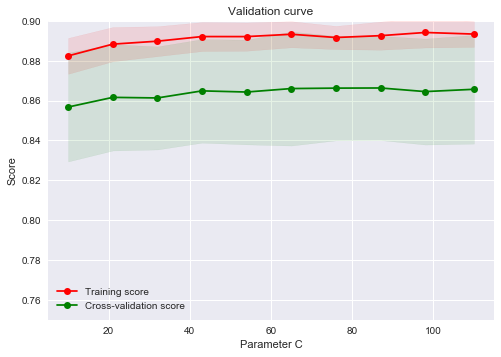

In [107]:

#??????????? remove at the end
#def validation_curve_model(X, Y, model, param_name, parameters, cv, ylim, log=True):
#validation_curve_model(X_data, Y_data, RandomForestClassifier(min_samples_leaf=12), "n_estimators", param_range, cv, ylim, log=False)

ylim=[0.75, 0.90]

model=RandomForestClassifier(min_samples_leaf=12)
param_name="n_estimators"
param_range = np.linspace(10, 110, 10).astype(int)
log=False


param_range = np.linspace(10, 110, 10).astype(int)
ylim=[0.75, 0.90]
validation_curve_model(X, Y, RandomForestClassifier(min_samples_leaf=12), "n_estimators", param_range, cv, ylim, log=False)
plt.show()   

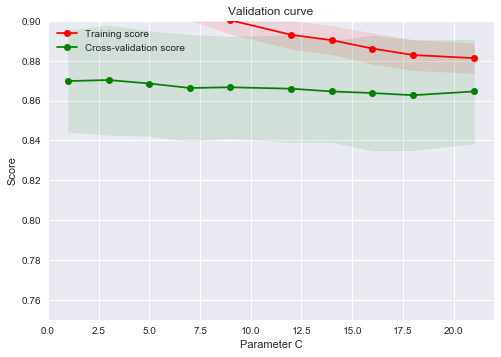

In [109]:

param_range = np.linspace(1, 21, 10).astype(int)
ylim=[0.75, 0.90]
validation_curve_model(X,Y, RandomForestClassifier(n_estimators=80), "min_samples_leaf", param_range, cv, ylim, log=False)
plt.show() 

In [ ]:
# To do
# Random forest score is higher based on accuracy?
#
# draw ROC graph